Import libraries

In [1]:
import cenpy as cen
import numpy as np
import pandas as pd
import geopandas as gpd
import pysal
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\zstat\Anaconda2\envs\py36\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


## Establish a Connection to a U.S. Census API

In [2]:
# Identify all of the available US Census Bureau API's
datasets = list(cen.explorer.available(verbose=True).items())

# Display the DataFrame
with pd.option_context('display.max_rows', 10):
    display(pd.DataFrame(datasets))

,0,1
0,NONEMP2007,2007 Nonemployer Statistics: Non Employer Stat...
1,POPESTagesex,Vintage 2014 Population Estimates: National An...
2,ZBPTotal2011,2011 County Business Patterns - Zip Code Busin...
3,ITMONTHLYIMPORTSUSDA,Time Series International Trade: Monthly U.S. ...
4,POPESTnatmonthly2015,Vintage 2015 Population Estimates: National Mo...
...,...,...
303,CBP2016,2016 County Business Patterns
304,POPESTintercensalnatmonthly2000,2000 Population Estimates - 2000-2010 Intercen...
305,EITSQFR,Time Series Economic Indicators Time Series -:...
306,CBP1989,1989 County Business Patterns: Business Patterns


In [3]:
# Select Detailed Tables dataset
dataset = 'ACSDT5Y2017'

In [4]:
# Establish a connection with the Detailed Tables API
con = cen.base.Connection(dataset)
con

Connection to ACS 5-Year Detailed Tables (ID: https://api.census.gov/data/id/ACSDT5Y2017)

In [5]:
# Explore the available search paramaters
vars = con.variables
vars.head(5)

,attributes,concept,group,label,limit,predicateOnly,predicateType,required,values
for,NaN,Census API Geography Specification,N/A,Census API FIPS 'for' clause,0,True,fips-for,NaN,NaN
in,NaN,Census API Geography Specification,N/A,Census API FIPS 'in' clause,0,True,fips-in,NaN,NaN
ucgid,NaN,Census API Geography Specification,N/A,Uniform Census Geography Identifier clause,0,True,ucgid,NaN,NaN
B06004HPR_002E,"B06004HPR_002M,B06004HPR_002MA,B06004HPR_002EA","PLACE OF BIRTH (WHITE ALONE, NOT HISPANIC OR L...",B06004HPR,Estimate!!Total!!Born in Puerto Rico,0,NaN,int,NaN,NaN
B02019_008E,"B02019_008M,B02019_008MA,B02019_008EA",NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALO...,B02019,Estimate!!Total Groups Tallied!!Micronesian!!O...,0,NaN,int,NaN,NaN


In [6]:
#Identify columns of interest by searching key words
vars[vars['label'].str.contains("poverty")]

,attributes,concept,group,label,limit,predicateOnly,predicateType,required,values
C27018_005E,"C27018_005EA,C27018_005M,C27018_005MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO ...,C27018,Estimate!!Total!!Under 1.00 of poverty thresho...,0,NaN,int,NaN,NaN
C27018_006E,"C27018_006EA,C27018_006M,C27018_006MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO ...,C27018,Estimate!!Total!!Under 1.00 of poverty thresho...,0,NaN,int,NaN,NaN
C27018_004E,"C27018_004EA,C27018_004M,C27018_004MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO ...,C27018,Estimate!!Total!!Under 1.00 of poverty thresho...,0,NaN,int,NaN,NaN
C27018_003E,"C27018_003EA,C27018_003M,C27018_003MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO ...,C27018,Estimate!!Total!!Under 1.00 of poverty thresho...,0,NaN,int,NaN,NaN
C27018_002E,"C27018_002EA,C27018_002M,C27018_002MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO ...,C27018,Estimate!!Total!!Under 1.00 of poverty threshold,0,NaN,int,NaN,NaN
C27018_009E,"C27018_009EA,C27018_009M,C27018_009MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO ...,C27018,Estimate!!Total!!Under 1.00 of poverty thresho...,0,NaN,int,NaN,NaN
C27018_008E,"C27018_008EA,C27018_008M,C27018_008MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO ...,C27018,Estimate!!Total!!Under 1.00 of poverty thresho...,0,NaN,int,NaN,NaN
C27018_007E,"C27018_007EA,C27018_007M,C27018_007MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO ...,C27018,Estimate!!Total!!Under 1.00 of poverty thresho...,0,NaN,int,NaN,NaN
C27018_011E,"C27018_011EA,C27018_011M,C27018_011MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO ...,C27018,Estimate!!Total!!Under 1.00 of poverty thresho...,0,NaN,int,NaN,NaN
C27018_010E,"C27018_010EA,C27018_010M,C27018_010MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO ...,C27018,Estimate!!Total!!Under 1.00 of poverty thresho...,0,NaN,int,NaN,NaN


## Access U.S. Census population data by tract and county

In [7]:
# Select total population ('B01003_001E'), white population ('B03002_003E'),
# and population below the poverty line ('B17001_002E')
cols = ['B01003_001E','B03002_003E','B17001_002E']

In [8]:
# Explore the columns from the Detailed Tables dataset
cols_detail=pd.DataFrame(con.variables.loc[cols].label)

with pd.option_context('display.max_colwidth',0):
    display(cols_detail)
# Columns can be explored more here: https://api.census.gov/data/2017/acs/acs5/groups/B03002.html
# And here: https://api.census.gov/data/2017/acs/acs5/variables.html

,label
B01003_001E,Estimate!!Total
B03002_003E,Estimate!!Total!!Not Hispanic or Latino!!White alone
B17001_002E,Estimate!!Total!!Income in the past 12 months below poverty level


In [9]:
data_tract = con.query(cols, geo_unit = 'tract', geo_filter = {'state':'34'})
data_county = con.query(cols, geo_unit = 'county', geo_filter = {'state':'34'}) 
# Prints a deprecation warning because of how cenpy calls pandas

C:\Users\zstat\Anaconda2\envs\py36\lib\site-packages\cenpy\remote.py:172: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df[cols] = df[cols].convert_objects(convert_numeric=convert_numeric)


In [10]:
data_tract.head(10)

,B01003_001E,B03002_003E,B17001_002E,state,county,tract
0,3769,2061,116,34,007,603100
1,3537,2926,132,34,007,603601
2,5369,4800,215,34,007,603800
3,5746,231,1895,34,007,601500
4,3442,2843,262,34,007,604400
5,2212,2119,142,34,007,605100
6,7270,4300,432,34,007,603400
7,3488,2411,98,34,007,603505
8,5987,4269,99,34,007,603506
9,1500,147,512,34,007,601800


In [11]:
data_county.head(10)

,B01003_001E,B03002_003E,B17001_002E,state,county
0,627551,473037,47055,34,025
1,373362,189649,40450,34,021
2,143570,125183,7573,34,037
3,154952,73427,26781,34,011
4,333316,192408,15745,34,035
5,800401,249087,130583,34,013
6,589699,500671,63181,34,029
7,272926,153899,40750,34,001
8,291372,230567,22815,34,015
9,837288,371039,69297,34,023


In [12]:
# Change column names for tract data
cen_data_tract = data_tract.rename(columns={'B01003_001E': 'total_pop',
                                            'B03002_003E': 'white_pop', 
                                            'B17001_002E': 'pov_pop'})
cen_data_tract['GEOID']=cen_data_tract['state']+cen_data_tract['county']+cen_data_tract['tract']
cen_data_tract.head(5)

,total_pop,white_pop,pov_pop,state,county,tract,GEOID
0,3769,2061,116,34,007,603100,34007603100
1,3537,2926,132,34,007,603601,34007603601
2,5369,4800,215,34,007,603800,34007603800
3,5746,231,1895,34,007,601500,34007601500
4,3442,2843,262,34,007,604400,34007604400


In [13]:
# Change column names for Census data
cen_data_county = data_county.rename(columns={'B01003_001E': 'total_pop',
                                            'B03002_003E': 'white_pop', 
                                            'B17001_002E': 'pov_pop'})
cen_data_county.head(5)

,total_pop,white_pop,pov_pop,state,county
0,627551,473037,47055,34,025
1,373362,189649,40450,34,021
2,143570,125183,7573,34,037
3,154952,73427,26781,34,011
4,333316,192408,15745,34,035


In [14]:
# Explore the data to determine number of entries etc.
cen_data_tract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 7 columns):
total_pop    2010 non-null int64
white_pop    2010 non-null int64
pov_pop      2010 non-null int64
state        2010 non-null object
county       2010 non-null object
tract        2010 non-null object
GEOID        2010 non-null object
dtypes: int64(3), object(4)
memory usage: 110.0+ KB


In [15]:
cen_data_county.info()
# Export the County data to csv for the county-level analysis
cen_data_county.to_csv('../Data/Created/census_county.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
total_pop    21 non-null int64
white_pop    21 non-null int64
pov_pop      21 non-null int64
state        21 non-null object
county       21 non-null object
dtypes: int64(3), object(2)
memory usage: 920.0+ bytes


## Plot TIGER shapefile of Census tract boundaries

In [16]:
# Determine what Topologically Integrated Geopgrahic Encoding and Referencing (TIGER) data is available
cen.tiger.available()

[{'name': 'AIANNHA', 'type': 'MapServer'},
 {'name': 'CBSA', 'type': 'MapServer'},
 {'name': 'Hydro_LargeScale', 'type': 'MapServer'},
 {'name': 'Hydro', 'type': 'MapServer'},
 {'name': 'Labels', 'type': 'MapServer'},
 {'name': 'Legislative', 'type': 'MapServer'},
 {'name': 'Places_CouSub_ConCity_SubMCD', 'type': 'MapServer'},
 {'name': 'PUMA_TAD_TAZ_UGA_ZCTA', 'type': 'MapServer'},
 {'name': 'Region_Division', 'type': 'MapServer'},
 {'name': 'School', 'type': 'MapServer'},
 {'name': 'Special_Land_Use_Areas', 'type': 'MapServer'},
 {'name': 'State_County', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2013', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2014', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2015', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2016', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2017', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2018', 'type': 'MapServer'},
 {'name': 'tigerWMS_Census2010', 'type': 'MapServer'},
 {'name': 'tigerWMS_Current', 'type': 'MapServer

In [17]:
# Connect to TIGER API
con.set_mapservice('tigerWMS_ACS2017')

# Print layers
con.mapservice.layers

{0: (ESRILayer) 2010 Census Public Use Microdata Areas,
 1: (ESRILayer) 2010 Census Public Use Microdata Areas Labels,
 2: (ESRILayer) 2010 Census ZIP Code Tabulation Areas,
 3: (ESRILayer) 2010 Census ZIP Code Tabulation Areas Labels,
 4: (ESRILayer) Tribal Census Tracts,
 5: (ESRILayer) Tribal Census Tracts Labels,
 6: (ESRILayer) Tribal Block Groups,
 7: (ESRILayer) Tribal Block Groups Labels,
 8: (ESRILayer) Census Tracts,
 9: (ESRILayer) Census Tracts Labels,
 10: (ESRILayer) Census Block Groups,
 11: (ESRILayer) Census Block Groups Labels,
 12: (ESRILayer) Unified School Districts,
 13: (ESRILayer) Unified School Districts Labels,
 14: (ESRILayer) Secondary School Districts,
 15: (ESRILayer) Secondary School Districts Labels,
 16: (ESRILayer) Elementary School Districts,
 17: (ESRILayer) Elementary School Districts Labels,
 18: (ESRILayer) Estates,
 19: (ESRILayer) Estates Labels,
 20: (ESRILayer) County Subdivisions,
 21: (ESRILayer) County Subdivisions Labels,
 22: (ESRILayer) 

In [18]:
# Select County data
# Note: By selecting "geopandas" I am packing the shape into a GeoPandas DataFrame. 
# The default is a pySAL shape. Another option is "shapely"
geodata = con.mapservice.query(layer=8, where='STATE=34', pkg='geopandas')

In [19]:
# Preview the geodata
with pd.option_context('display.max_colwidth', 35):
    display(geodata.head(5))

,AREALAND,AREAWATER,BASENAME,CENTLAT,CENTLON,COUNTY,FUNCSTAT,GEOID,INTPTLAT,INTPTLON,LSADC,MTFCC,NAME,OBJECTID,OID,STATE,STGEOMETRY.AREA,STGEOMETRY.LEN,TRACT,geometry
0,2045098,2421092,7137,+40.0591547,-074.0846083,029,S,34029713700,+40.0633714,-074.0861089,CT,G5020,Census Tract 7137,296,20757537527182,34,7.632871e+06,18250.432033,713700,POLYGON ((-8249807.646600001 48...
1,6947272,4268255,7138,+40.0428715,-074.0768848,029,S,34029713800,+40.0429809,-074.0753939,CT,G5020,Census Tract 7138,337,20757537527132,34,1.915864e+07,21673.434238,713800,POLYGON ((-8250039.191199999 48...
2,1052665,0,34.02,+40.9153571,-074.0055605,003,S,34003003402,+40.9153571,-074.0055605,CT,G5020,Census Tract 34.02,455,20757707077793,34,1.845163e+06,6736.463432,003402,POLYGON ((-8239049.3971 4999140...
3,1418062,9362,35,+40.9177332,-073.9890303,003,S,34003003500,+40.9175862,-073.9884116,CT,G5020,Census Tract 35,456,20757707077513,34,2.502242e+06,6913.314607,003500,POLYGON ((-8237369.363299999 49...
4,1489434,0,139,+40.8142812,-074.1730998,013,S,34013013900,+40.8142812,-074.1730998,CT,G5020,Census Tract 139,554,20757428058875,34,2.602867e+06,6644.963532,013900,POLYGON ((-8258119.6504 4984688...


In [20]:
# Get info on geodata and confirm it has same number of entries as census data
geodata.info()
geodata.crs

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 20 columns):
AREALAND           2010 non-null int64
AREAWATER          2010 non-null int64
BASENAME           2010 non-null object
CENTLAT            2010 non-null object
CENTLON            2010 non-null object
COUNTY             2010 non-null object
FUNCSTAT           2010 non-null object
GEOID              2010 non-null object
INTPTLAT           2010 non-null object
INTPTLON           2010 non-null object
LSADC              2010 non-null object
MTFCC              2010 non-null object
NAME               2010 non-null object
OBJECTID           2010 non-null int64
OID                2010 non-null int64
STATE              2010 non-null object
STGEOMETRY.AREA    2010 non-null float64
STGEOMETRY.LEN     2010 non-null float64
TRACT              2010 non-null object
geometry           2010 non-null object
dtypes: float64(2), int64(4), object(14)
memory usage: 314.1+ KB


{'wkid': 102100, 'latestWkid': 3857}

In [21]:
# The current way the crs is stored is a dictionary using latestwkid, which causes errors during export. I converted the crs 
# dictionary into one readable by geopandas, but it is not transforming the data in any way. 
geodata.crs = {'init': 'epsg:3857'}

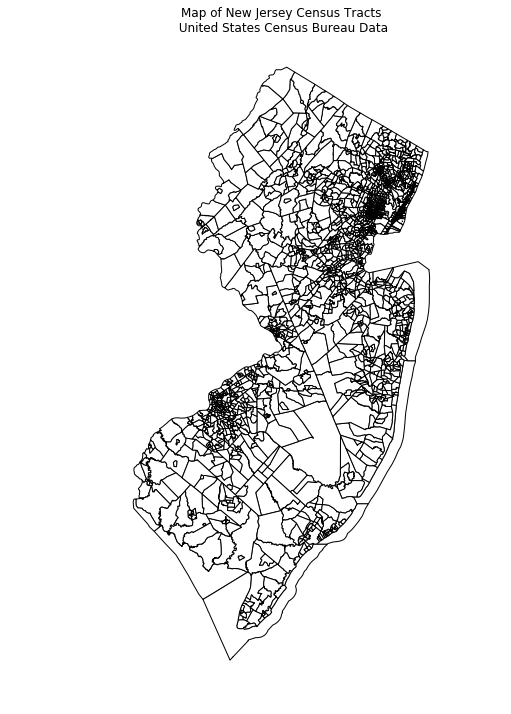

In [22]:
# Plot the data
fig, ax = plt.subplots(figsize = (8,12))
geodata.plot(ax = ax, facecolor='white',edgecolor='black')

# Add title to map
ax.set(title = "Map of New Jersey Census Tracts\n United States Census Bureau Data")

# Turn off the axis
plt.axis('equal')
ax.set_axis_off()
plt.show()

## Visualize Census tract data

In [23]:
# Use an attribute join to merge Census data to geopandas dataframe
# First rename column so easy to join
geo_cen_data = geodata.merge(cen_data_tract, on='GEOID')

In [24]:
geo_cen_data = geo_cen_data.drop(columns=['COUNTY','FUNCSTAT','INTPTLAT','INTPTLON','LSADC','MTFCC','NAME','OBJECTID','OID','STATE'])

In [25]:
#Confirm still the same number of entries
geo_cen_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2010 entries, 0 to 2009
Data columns (total 16 columns):
AREALAND           2010 non-null int64
AREAWATER          2010 non-null int64
BASENAME           2010 non-null object
CENTLAT            2010 non-null object
CENTLON            2010 non-null object
GEOID              2010 non-null object
STGEOMETRY.AREA    2010 non-null float64
STGEOMETRY.LEN     2010 non-null float64
TRACT              2010 non-null object
geometry           2010 non-null object
total_pop          2010 non-null int64
white_pop          2010 non-null int64
pov_pop            2010 non-null int64
state              2010 non-null object
county             2010 non-null object
tract              2010 non-null object
dtypes: float64(2), int64(5), object(9)
memory usage: 267.0+ KB


In [26]:
# Add columns showing percentage of people under the poverty line and percentage people of color
geo_cen_data['POC_pop'] = geo_cen_data['total_pop'] - geo_cen_data['white_pop']
geo_cen_data['perc_POC'] = (geo_cen_data['POC_pop'] / geo_cen_data['total_pop']) * 100
geo_cen_data['perc_pov'] = (geo_cen_data['pov_pop'] / geo_cen_data['total_pop']) * 100

In [27]:
# Filter out tracts that are entirely water
geo_cen_data = geo_cen_data[geo_cen_data['AREALAND']!=0]

In [28]:
# Remove all tracts with 0 population
geo_cen_data = geo_cen_data[geo_cen_data['total_pop']!=0]

In [29]:
with pd.option_context('display.max_colwidth',20, 'display.max_columns',0):
    display(geo_cen_data.head())

geo_cen_data.info()

,AREALAND,AREAWATER,BASENAME,CENTLAT,CENTLON,GEOID,STGEOMETRY.AREA,STGEOMETRY.LEN,TRACT,geometry,total_pop,white_pop,pov_pop,state,county,tract,POC_pop,perc_POC,perc_pov
0,2045098,2421092,7137,+40.0591547,-074.0846083,34029713700,7.632871e+06,18250.432033,713700,POLYGON ((-82498...,2569,2285,58,34,029,713700,284,11.054885,2.257688
1,6947272,4268255,7138,+40.0428715,-074.0768848,34029713800,1.915864e+07,21673.434238,713800,POLYGON ((-82500...,3395,2874,241,34,029,713800,521,15.346097,7.098675
2,1052665,0,34.02,+40.9153571,-074.0055605,34003003402,1.845163e+06,6736.463432,003402,POLYGON ((-82390...,3744,2030,32,34,003,003402,1714,45.779915,0.854701
3,1418062,9362,35,+40.9177332,-073.9890303,34003003500,2.502242e+06,6913.314607,003500,POLYGON ((-82373...,4106,823,494,34,003,003500,3283,79.956162,12.031174
4,1489434,0,139,+40.8142812,-074.1730998,34013013900,2.602867e+06,6644.963532,013900,POLYGON ((-82581...,4916,3268,121,34,013,013900,1648,33.523190,2.461351


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2001 entries, 0 to 2009
Data columns (total 19 columns):
AREALAND           2001 non-null int64
AREAWATER          2001 non-null int64
BASENAME           2001 non-null object
CENTLAT            2001 non-null object
CENTLON            2001 non-null object
GEOID              2001 non-null object
STGEOMETRY.AREA    2001 non-null float64
STGEOMETRY.LEN     2001 non-null float64
TRACT              2001 non-null object
geometry           2001 non-null object
total_pop          2001 non-null int64
white_pop          2001 non-null int64
pov_pop            2001 non-null int64
state              2001 non-null object
county             2001 non-null object
tract              2001 non-null object
POC_pop            2001 non-null int64
perc_POC           2001 non-null float64
perc_pov           2001 non-null float64
dtypes: float64(4), int64(6), object(9)
memory usage: 312.7+ KB


C:\Users\zstat\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


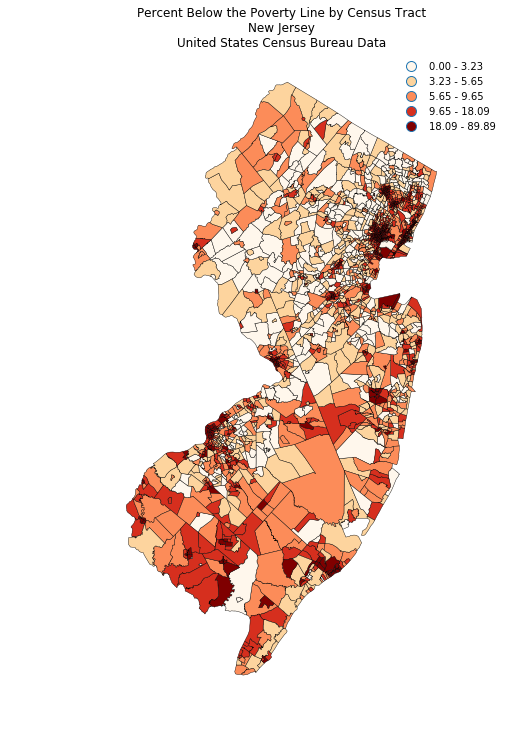

In [30]:
# Plotting percent below the poverty line
# Plot the data
fig, ax = plt.subplots(figsize = (8,12))
geo_cen_data.plot(ax = ax,
                  column='perc_pov', 
                  scheme='QUANTILES',
                  k=5,cmap='OrRd',
                  edgecolor='black',
                  linewidth=0.4, 
                  legend=True)

# Geopandas source codes as the legend as a second axis
legend = ax.get_legend()
legend.get_frame().set_linewidth(0.0)
#legend.set(title = 'Percentage Below the Poverty Line')

# Add title to map
ax.set(title = "Percent Below the Poverty Line by Census Tract\n" +
       "New Jersey\n"+
       "United States Census Bureau Data")

# Turn off the axis
plt.axis('equal')
ax.set_axis_off()
plt.show()

C:\Users\zstat\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


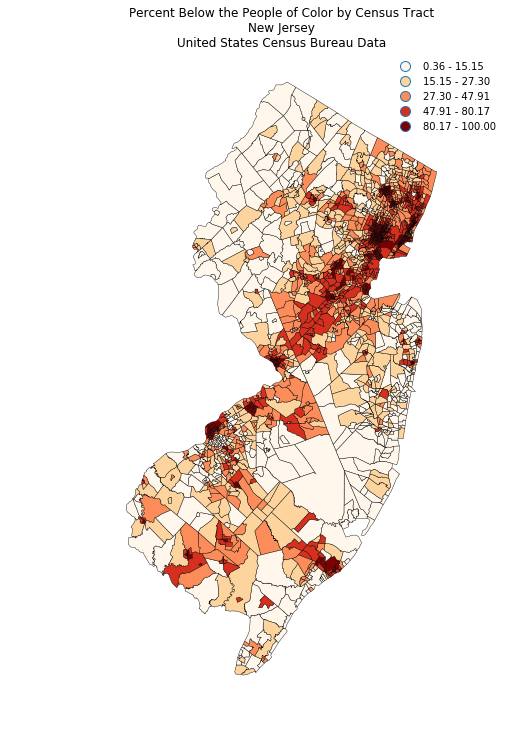

In [31]:
# Plotting percent POC
# Plot the data
fig, ax = plt.subplots(figsize = (8,12))
geo_cen_data.plot(ax = ax,
                  column='perc_POC', 
                  scheme='QUANTILES',
                  k=5,cmap='OrRd',
                  edgecolor='black',
                  linewidth=0.4, 
                  legend=True)

# Geopandas source codes as the legend as a second axis
legend = ax.get_legend()
legend.get_frame().set_linewidth(0.0)
#legend.set(title = 'Percentage Below the Poverty Line')


# Add title to map
ax.set(title = "Percent Below the People of Color by Census Tract\n" +
       "New Jersey\n"+
       "United States Census Bureau Data")

# Turn off the axis
plt.axis('equal')
ax.set_axis_off()
plt.show()

In [32]:
# Examine types of files I can export to
import fiona; fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [33]:
# Export as ESRI shapefile and GeoJSON
shapefilename = r'C:\Users\zstat\Documents\RecurseCenter\EJ-analysis-map\Data\Created\NJ_cen_data.shp'
geo_cen_data.to_file(driver='ESRI Shapefile',filename=shapefilename)



In [34]:
out = gpd.read_file(r'C:\Users\zstat\Documents\RecurseCenter\EJ-analysis-map\Data\Created\NJ_cen_data.shp')

In [35]:
#Check the coordinate system
out.crs

{'init': 'epsg:3857'}